In [ ]:
!pip install matplotlib

In [21]:
import pandas as pd
import csv
import base64
import numpy as np
import matplotlib.pyplot as plt

In [6]:
cols = ['num_boxes', 'class_labels', 'query']

In [7]:
train = pd.read_csv('data/train.tsv',sep='\t', quoting=csv.QUOTE_NONE, usecols=cols)

In [8]:
def get_label(path):
    with open(path) as f:
        lines = f.readlines()
        label2id = {l.split('\n')[0].split('\t')[1]:int(l.split('\n')[0].split('\t')[0]) for l in lines[1:]}
        id2label = {int(l.split('\n')[0].split('\t')[0]):l.split('\n')[0].split('\t')[1] for l in lines[1:]}
    return label2id, id2label

LABEL_PATH = 'data/multimodal_labels.txt'
label2id, id2label = get_label(LABEL_PATH)

In [58]:
len(label2id)

33

In [39]:
def convertLabelWord(num_boxes, label):
    temp = np.frombuffer(base64.b64decode(label), dtype=np.int64).reshape(num_boxes)
    return '###'.join([id2label[t] for t in temp])

In [40]:
train.shape

(3000000, 5)

In [41]:
train['all_labels'] = train.apply(lambda x: convertLabelWord(x['num_boxes'], x['class_labels']), axis=1)

train['all_query'] = train.apply(lambda x: x['query'], axis=1)

In [42]:
train.head()

,num_boxes,class_labels,query,all_labels,all_query
0,2,HAAAAAAAAAAcAAAAAAAAAA==,treble popular reed,others###others,treble popular reed
1,1,HAAAAAAAAAA=,compatible ink cartridges,others,compatible ink cartridges
2,1,BwAAAAAAAAA=,check new look facial cream,"makeup, perfume, beauty tools and essential oils",check new look facial cream
3,5,HAAAAAAAAAAcAAAAAAAAABwAAAAAAAAAHAAAAAAAAAAcAA...,royal commemorative stamp,others###others###others###others###others,royal commemorative stamp
4,4,HAAAAAAAAAAGAAAAAAAAAAYAAAAAAAAAHAAAAAAAAAA=,calendula baby shower gel,"others###snacks, nuts, liquor and tea###snacks...",calendula baby shower gel


In [70]:
counts = train.all_labels.str.split('###', expand=True).stack().value_counts()

In [71]:
counts

others                                                                     5187306
shoes                                                                      1271664
top clothes (coat, jacket, shirt, etc.)                                    1048456
accessories (jewelry, clothing accessories, belts, hats, scarves, etc.)     812948
human face                                                                  621413
bottom clothes (trousers, pants, etc.)                                      519996
toys                                                                        435073
luggage, leather goods                                                      424099
furniture                                                                   291699
snacks, nuts, liquor and tea                                                262636
makeup, perfume, beauty tools and essential oils                            199361
skirt & dress                                                               138670
bott

In [53]:
import seaborn as sns

In [74]:
counts_df = pd.DataFrame({'Label':np.arange(len(counts)), 'Count':counts.values})

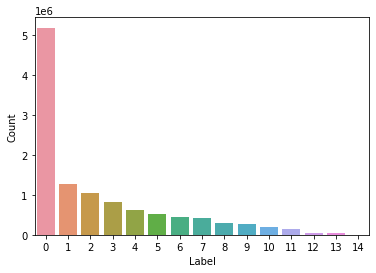

In [75]:
ax = sns.barplot(x='Label', y='Count', data=counts_df)

In [59]:
train['query_len'] = train.apply(lambda x: len(x['query'].split()), axis=1)

In [60]:
counts = train.query_len.value_counts()

In [62]:
counts

3     982950
4     898248
5     464082
2     325720
6     211812
7      75507
8      24528
1       9179
9       6319
10      1292
11       280
12        57
13        13
21         6
14         4
15         2
16         1
Name: query_len, dtype: int64

In [66]:
counts_df = pd.DataFrame({'Query_Length':counts.index, 'Counts':counts.values})

In [67]:
counts_df

,Query_Length,Counts
0,3,982950
1,4,898248
2,5,464082
3,2,325720
4,6,211812
5,7,75507
6,8,24528
7,1,9179
8,9,6319
9,10,1292


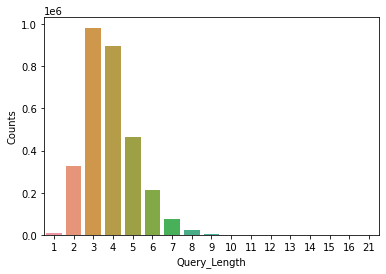

In [69]:
ax = sns.barplot(x='Query_Length', y='Counts', data=counts_df)